# Part 2: Modern Portfolio Theory with Python
Modern portfolio theory (MPT), or mean-variance analysis, introduced by Harry Markowitz, is a mathematical framework for assembling a portfolio of assets such that the expected return is maximized for a given level of risk, defined as variance. Its key insight is that an asset’s risk and return should not be assessed by itself, but by how it contributes to a portfolio’s overall risk and return.

# Model Assumptions
The MPT assumes that investors are rational and risk averse. That is, given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns. Conversely, an investor who wants higher expected returns must accept more risk.
<ul>
<li>Asset returns are normally distributed random variables.
<li>Investors attempt to maximize economic market returns.
<li>Investors are rational and avoid risk when possible.
<li>Investors all have access to the same sources of information for investment decisions.
<li>Investors share similar views on expected returns.
<li>Taxes and brokerage commissions are not considered.
<li>Investors are not large enough players in the market to influence the price.
<li>Investors have unlimited access to borrow (and lend) money at the risk free rate.
</ul>

Building Available Market Portfolios
With the following functions we can create random portfolio weights which are used to construct random portfolios from the included returns series. For these randomly created portfolios we calculate the means and standard deviation, and finally plot the set of obtain random portfolios.

In [1]:
def create_random_weights(n_assets):
    '''
    returns randomly choosen portfolio weights that sum to one
    '''
    w = np.random.rand(n_assets)
    return w / w.sum()

In [2]:
def evaluate_random_portfolio(returns):
    ''' 
    returns the mean and standard deviation of returns for a random portfolio
    '''
    # in case a resampler is used
    returns = pd.DataFrame(returns)   
    
    # calculate from covariance, asset returns and weights
    cov = np.matrix(returns.cov())
    R = np.matrix(returns.mean())
    w = np.matrix(create_random_weights(returns.shape[1]))
    
    # calculate expected portfolio return and risk
    mu = w * R.T
    sigma = np.sqrt(w * cov * w.T)
    
    return mu, sigma

In [3]:
def create_random_portfolios(returns, n_portfolios=1500):
    '''
    plots randomly created portfolios
    '''
    # calculate mean and std for every portfolio
    pf_mus, pf_sigmas = np.column_stack([evaluate_random_portfolio(returns) for _ in range(n_portfolios)])

    return pf_mus, pf_sigmas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)
 
# length of artificial time series
n_obs = 1000
 
# number of different assets
n_assets = 4
 
# sample Nx4 data series matrix
artificial_returns = np.random.randn(n_obs, n_assets) + 0.05
artificial_returns

array([[ 1.67434536, -0.56175641, -0.47817175, -1.02296862],
       [ 0.91540763, -2.2515387 ,  1.79481176, -0.7112069 ],
       [ 0.3690391 , -0.19937038,  1.51210794, -2.01014071],
       ...,
       [ 0.12341633,  0.46602616, -1.82920004,  0.62545885],
       [ 0.15206241,  1.23430372, -0.74484305, -0.07590305],
       [-0.9103464 , -0.79391327,  0.67834172,  0.58721449]])

In [7]:
pf_mus, pf_sigmas = create_random_portfolios(artificial_returns, n_portfolios=3000)

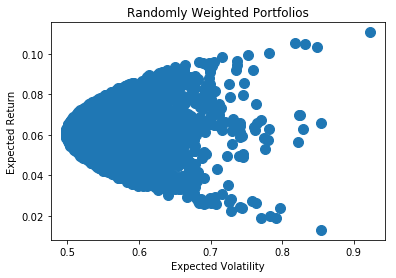

In [28]:
# scatter plot for expected return and volatility
plt.plot(pf_sigmas, pf_mus, 'o', markersize=10)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Randomly Weighted Portfolios')

plt.show()

# Part 3: Efficient Market Frontier
Remember that a rational investor will always choose the volatility minimizing portfolio for a given level of return or the return maximizing portfolio for a given level of volatility. Thus, it would make no sense to hold any portfolio other than those on the outermost surface line on the upper half of the graph. This line is called the Efficient Market Frontier as they earn the highest expected return possible for a certain level of risk.

In [29]:
import cvxopt

ImportError: DLL load failed: The specified module could not be found.